# Demo with Gradio


This notebook demonstrates the [gradio](https://www.gradio.app/) library, which allows you to create demo interfaces very easily.


## Object Detection Interface


For this example, we use an object detection model trained on the 80 classes of the [COCO](https://cocodataset.org/#home) dataset.
We use Meta's [DETR](https://research.facebook.com/publications/end-to-end-object-detection-with-transformers/) model (facebook/detr-resnet-50).


### Implementation


First, let's build our pipeline using Hugging Face's transformers library.


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline
import cv2
import numpy as np

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
detector = pipeline("object-detection", "facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


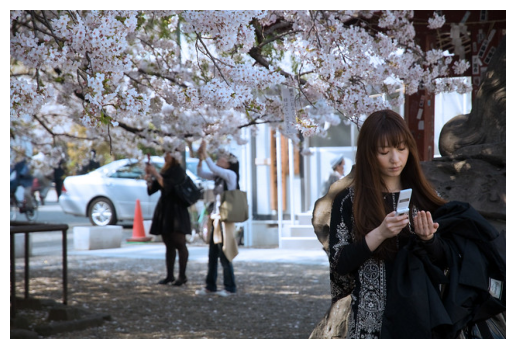

In [3]:
image = Image.open('images/coco3.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

Let's proceed with the detection and draw the boxes. For a clear result, we will only outline people. You can remove this filter if you wish.


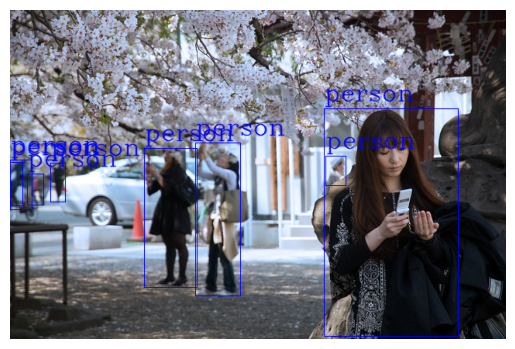

In [4]:
def draw_boxes(image,output):
  cv_image = np.array(image)
  for bbox in output:
    box = bbox['box']
    label = bbox['label']
    if (label!="person"):
      continue
    cv2.rectangle(cv_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 1)
    cv2.putText(cv_image, label, (box['xmin'], box['ymin'] - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
  return cv_image

output = detector(image)
cv_image=draw_boxes(image,output)
plt.imshow(cv_image)
plt.axis('off')
plt.show()


### Gradio Demo


Now it's time to build our demo with Gradio. The idea is to have an interface that takes an image as input and returns the same image with people outlined.


In [5]:
import gradio as gr

In [6]:
def get_pipeline_prediction(pil_image):
  pipeline_output = detector(pil_image)
  processed_image = draw_boxes(pil_image,pipeline_output)
  return processed_image

In [7]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Image d'entrée",type="pil"),
  outputs=gr.Image(label="Image avec les personnes détectées",type="pil")
)

IMPORTANT: You are using gradio version 4.24.0, however version 4.29.0 is available, please upgrade.
--------


In [8]:
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


And there you have it, you've built your own demo. You can share it by setting the *share=True* parameter in the *launch()* method. However, you'll need to keep your notebook active, otherwise the demo will disappear. To create a demo that doesn't require you to keep your PC on, you can create a space on the Hugging Face website (see notebook 1).


**Note**: Of course, Gradio has more features than this. I invite you to consult the [documentation](https://www.gradio.app/docs) and the various [tutorials](https://www.gradio.app/guides/quickstart) if you have a specific need.
